In [13]:
import pandas as pd

In [19]:
df=pd.read_csv("validation_error_analysis_20200816_v1.csv")

In [68]:
df[(df.label==df.actual)&(df.actual==1)]
df[(df.getty_tag.isna())]

,id,getty_caption,getty_tag,color_score,img_text,label,combined_text,hate_speech,offensive_language,neither,proba,actual
148,37465,NaN,NaN,99999.0,how black people became christians,1,how black people became christians,0.087138,0.312333,6.005289e-01,0.747698,0
226,8243,NaN,NaN,99999.0,damn i need some shades,0,damn i need some shades,0.035825,0.804301,1.598734e-01,0.236273,0
393,76381,NaN,NaN,99999.0,fuck obama fuck backlivesmatter fuck islam and...,1,fuck obama fuck backlivesmatter fuck islam a...,0.261290,0.738710,1.585246e-07,0.903782,1
1015,2153,NaN,NaN,99999.0,when you're arguing with someone and trying no...,0,when you're arguing with someone and trying ...,0.056580,0.370379,5.730412e-01,0.151949,0
1624,34876,NaN,NaN,99999.0,"on ur way going to d church, u see someone bea...",1,"on ur way going to d church, u see someone b...",0.094226,0.361141,5.446324e-01,0.652646,1
1969,16097,NaN,NaN,99999.0,"oh, you're tired of my anti-trump posts? why d...",0,"oh, you're tired of my anti-trump posts? why...",0.049083,0.438134,5.127830e-01,0.021913,0
2119,16593,NaN,NaN,99999.0,michelle is very jealous she didn't get a yumm...,1,michelle is very jealous she didn't get a yu...,0.038411,0.398953,5.626359e-01,0.528099,0
2125,63579,NaN,NaN,99999.0,53% of white women voted for trump 53% of whit...,1,53% of white women voted for trump 53% of wh...,0.509357,0.440385,5.025767e-02,0.690149,1


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(df[(df.getty_tag.isna())].label,df[(df.getty_tag.isna())].actual))
print(accuracy_score(df[(df.getty_tag.isna())].label,df[(df.getty_tag.isna())].actual))

[[3 0]
 [2 3]]
0.75


Logistic: ROC AUC=0.730


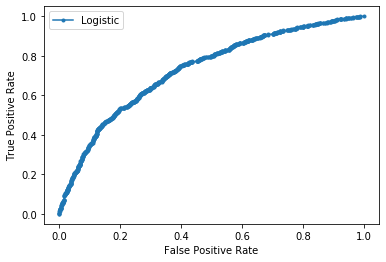

In [29]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


testy = df.actual
lr_probs = df.proba

# calculate scores
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [31]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(testy, lr_probs)

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

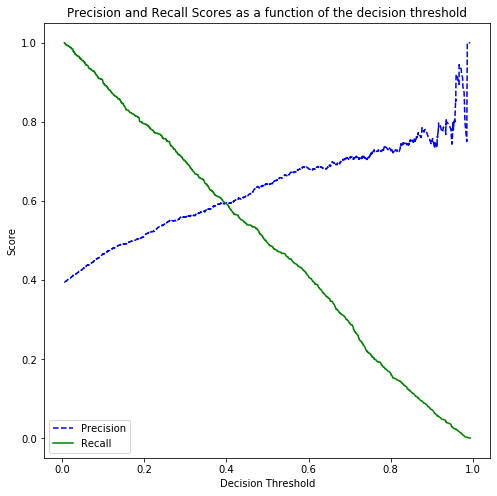

In [41]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(precision, recall, thresholds)